In [79]:
from scipy.integrate import RK45
import numpy as np 
import matplotlib.pyplot as plt

In [95]:
#The Woods Saxon potential is
def V(R):
    V0 = -61.1 #MeV
    A = 10 #mass of the core
    Rws = 1.2*A**(1/3) #fm
    aws = 0.65 #fm
    return V0/(1+np.exp((R-Rws)/aws))


def f(R,u,L,E):
    c1 = 197.32075 #MeV fm -> hc
    c2 = 0.0478450 #1/(MeV fm2) -> 2u/hbar2
    return np.array([[u[1,0]],[u[0,1]*(L*(L+1)/R**2 + c2*(V(R)-E))]])

def RKmethod(Rn=5,un=np.array([[0],[1]]),Lval=0,Eval=0,step_size = 0.1):
    for n in range(0,Rn,1):
        #define the parameters
        k1 = f(R=Rn,u=un,L=Lval,E=Eval)
        k2 = f(R=Rn+0.5*step_size,u=un+0.5*step_size*k1,L=Lval,E=Eval)
        k3 = f(R=Rn+0.5*step_size,u=un+0.5*step_size*k2,L=Lval,E=Eval)
        k4 = f(R=Rn+step_size,u=un+step_size*k3,L=Lval,E=Eval)
        #Redefine new functions
        un = un + (step_size/6)*(k1+2*k2+2*k3+k4)
        Rn = Rn + step_size
    return un[0,0]


In [96]:
r_array = np.arange(0.1,10,1)
y_l0 = [RKmethod(Rn=r,Lval=0,Eval=0.1) for r in r_array]

TypeError: 'numpy.float64' object cannot be interpreted as an integer

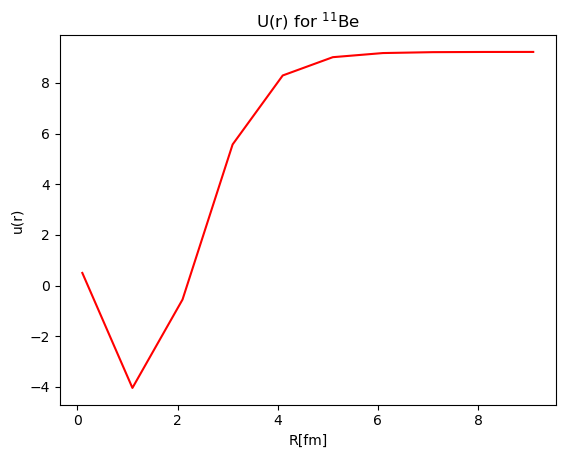

In [82]:
plt.plot(r_array, y_l0,label="l=0",color='r')
plt.title(r"U(r) for $^{11}$Be")
plt.xlabel("R[fm]")
plt.ylabel("u(r)")
plt.show()

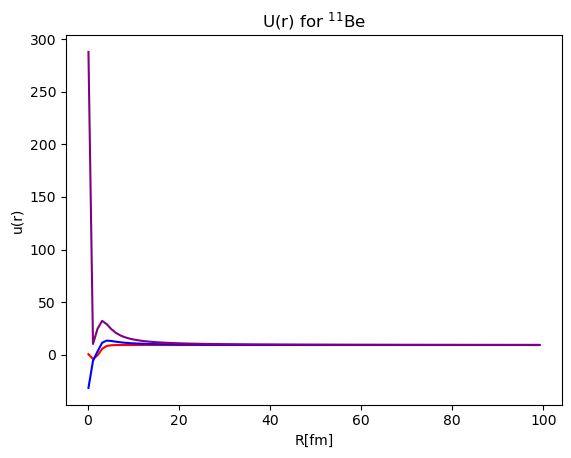

In [25]:


y_l1 = [RKmethod(Rn=r,L=1,E=0.1)[0] for r in r_array]
y_l2 = [RKmethod(Rn=r,L=2,E=0.1)[0] for r in r_array]

plt.plot(r_array, y_l0,label="l=0",color='r')
plt.plot(r_array, y_l1,label="l=1",color='b')
plt.plot(r_array, y_l2,label="l=2",color='purple')
plt.title(r"U(r) for $^{11}$Be")
plt.xlabel("R[fm]")
plt.ylabel("u(r)")
plt.show()

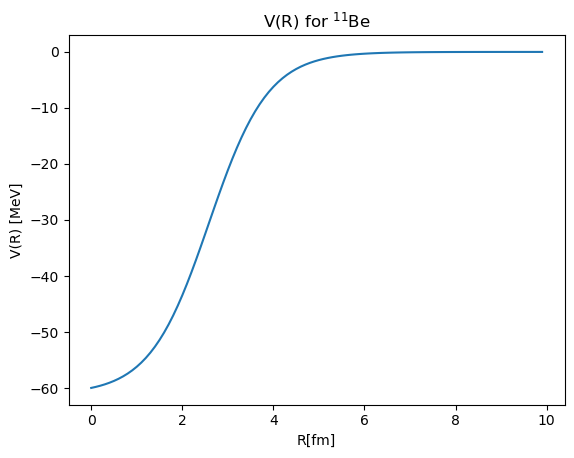

In [48]:
r_array = np.arange(0,10,0.1)
plt.plot(r_array, V(r_array))
plt.title(r"V(R) for $^{11}$Be")
plt.xlabel("R[fm]")
plt.ylabel("V(R) [MeV]")
plt.show()

In [23]:
#For the region outside the potential 

#May be reduce to one function 
def Hp(eta=0.,rho=1,L=0):
    """Hankel function (H^+)"""
    return 1j**(-L)*np.exp(1j*rho)

def Hn(eta=0.,rho=1,L=0):
    """Hankel function (H^-)"""
    return 1j**(L)*np.exp(-1j*rho)

def Smatrix(deltaL):
    """Smatrix"""
    ##UPDATE THE DELTA L (phase shift to be in terms of L)
    return np.exp(2j*deltaL)


#Use equation 3.1.27
def X(L,R):
    AL = 1 #update
    kR = R*10 #update
    deltaL=np.deg2rad(10) #update
    SL = Smatrix(deltaL)
    return AL*(Hn(L=L,rho=kR,eta=0)-SL*Hp(L=L,rho=kR,eta=0))
    

In [24]:
X(0,1)

(-0.236668383210333+1.3422130989790793j)

In [38]:
print(RK45(X, y0=np.arange(0,10,0.5), t0=10, t_bound=100).step())

None
